<a href="https://colab.research.google.com/github/pspanji/BA--BI--DS/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly as pt
import geopandas as gpd
import plotly.graph_objs as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/customer_supermarket.csv',error_bad_lines=False, sep='\t')
df1

<ipython-input-4-171967b4532f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('/content/drive/MyDrive/customer_supermarket.csv',error_bad_lines=False, sep='\t')


,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...,...
471905,541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [5]:
unique_count = df1['CustomerID'].nunique()
print("Number of unique values in 'CustomerID':", unique_count)

Number of unique values in 'CustomerID': 4372


In [6]:
df1.head()
column_headings = df1.columns.tolist()
print(column_headings)

['Unnamed: 0', 'BasketID', 'BasketDate', 'Sale', 'CustomerID', 'CustomerCountry', 'ProdID', 'ProdDescr', 'Qta']


In [7]:
print(df1)

        Unnamed: 0 BasketID      BasketDate  Sale  CustomerID CustomerCountry  \
0                0   536365  01/12/10 08:26  2,55     17850.0  United Kingdom   
1                1   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   
2                2   536365  01/12/10 08:26  2,75     17850.0  United Kingdom   
3                3   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   
4                4   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   
...            ...      ...             ...   ...         ...             ...   
471905      541905   581587  09/12/11 12:50   2,1     12680.0          France   
471906      541906   581587  09/12/11 12:50  4,15     12680.0          France   
471907      541907   581587  09/12/11 12:50  4,15     12680.0          France   
471908      541908   581587  09/12/11 12:50  4,95     12680.0          France   
471909      541909   581587  09/12/11 12:50    18     12680.0          France   

        ProdID             

In [8]:
df1.head()

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [9]:
df1.tail()

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
471905,541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3
471909,541909,581587,09/12/11 12:50,18,12680.0,France,POST,POSTAGE,1


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       471910 non-null  int64  
 1   BasketID         471910 non-null  object 
 2   BasketDate       471910 non-null  object 
 3   Sale             471910 non-null  object 
 4   CustomerID       406830 non-null  float64
 5   CustomerCountry  471910 non-null  object 
 6   ProdID           471910 non-null  object 
 7   ProdDescr        471157 non-null  object 
 8   Qta              471910 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 32.4+ MB


In [11]:
df1['CustomerCountry'] = df1['CustomerCountry'].astype('category')

In [12]:
df1['ProdDescr'] = df1['ProdDescr'].astype('category')

In [13]:
df1['ProdID'] = df1['ProdID'].astype('category')

In [14]:
df1['BasketDate'] = pd.to_datetime(df1['BasketDate'], format='%d/%m/%y %H:%M')

In [15]:
df1['Sale'] = df1['Sale'].str.replace(',', '.').astype(float)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       471910 non-null  int64         
 1   BasketID         471910 non-null  object        
 2   BasketDate       471910 non-null  datetime64[ns]
 3   Sale             471910 non-null  float64       
 4   CustomerID       406830 non-null  float64       
 5   CustomerCountry  471910 non-null  category      
 6   ProdID           471910 non-null  category      
 7   ProdDescr        471157 non-null  category      
 8   Qta              471910 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 24.2+ MB


In [17]:
df1

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...,...
471905,541905,581587,2011-12-09 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,2011-12-09 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,2011-12-09 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,2011-12-09 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [18]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
471905    False
471906    False
471907    False
471908    False
471909    False
Length: 471910, dtype: bool

In [19]:
df1.describe()

,Unnamed: 0,Sale,CustomerID,Qta
count,471910.000000,471910.000000,406830.000000,471910.000000
mean,274019.325265,4.030945,15287.684160,10.716533
std,154859.591780,83.769380,1713.603074,231.355136
min,0.000000,-11062.060000,12346.000000,-80995.000000
25%,140934.250000,1.250000,13953.000000,1.000000
50%,276740.500000,2.080000,15152.000000,4.000000
75%,407825.750000,3.750000,16791.000000,12.000000
max,541909.000000,38970.000000,18287.000000,80995.000000


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       471910 non-null  int64         
 1   BasketID         471910 non-null  object        
 2   BasketDate       471910 non-null  datetime64[ns]
 3   Sale             471910 non-null  float64       
 4   CustomerID       406830 non-null  float64       
 5   CustomerCountry  471910 non-null  category      
 6   ProdID           471910 non-null  category      
 7   ProdDescr        471157 non-null  category      
 8   Qta              471910 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 24.2+ MB


<Axes: >

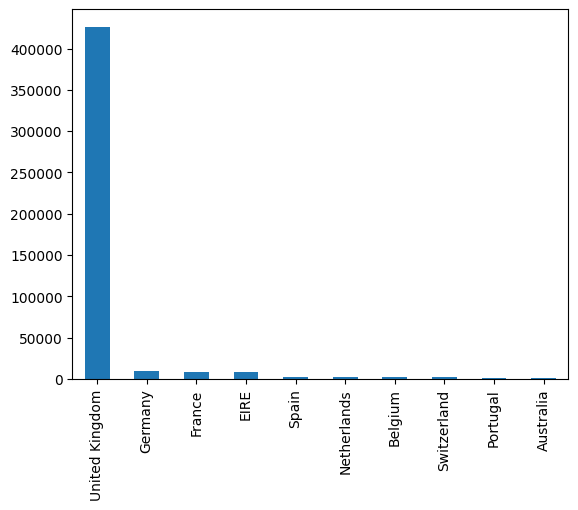

In [21]:
df1.CustomerCountry.value_counts()[:10].plot(kind='bar')

In [22]:
df1['Total_Revenue'] = df1['Sale'] * df1['Qta']
df1

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Total_Revenue
0,0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...,...
471905,541905,581587,2011-12-09 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
471906,541906,581587,2011-12-09 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
471907,541907,581587,2011-12-09 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60
471908,541908,581587,2011-12-09 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85


In [23]:
new_order = ['CustomerCountry', 'CustomerID', 'BasketID','BasketDate','ProdID','ProdDescr','Qta','Sale','Total_Revenue']
df1 = df1[new_order]
df1

,CustomerCountry,CustomerID,BasketID,BasketDate,ProdID,ProdDescr,Qta,Sale,Total_Revenue
0,United Kingdom,17850.0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,United Kingdom,17850.0,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34
2,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...
471905,France,12680.0,581587,2011-12-09 12:50:00,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
471906,France,12680.0,581587,2011-12-09 12:50:00,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
471907,France,12680.0,581587,2011-12-09 12:50:00,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60
471908,France,12680.0,581587,2011-12-09 12:50:00,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,14.85


In [24]:
df1.describe()

,CustomerID,Qta,Sale,Total_Revenue
count,406830.000000,471910.000000,471910.000000,471910.000000
mean,15287.684160,10.716533,4.030945,19.030258
std,1713.603074,231.355136,83.769380,400.925995
min,12346.000000,-80995.000000,-11062.060000,-168469.600000
25%,13953.000000,1.000000,1.250000,3.750000
50%,15152.000000,4.000000,2.080000,10.080000
75%,16791.000000,12.000000,3.750000,17.700000
max,18287.000000,80995.000000,38970.000000,168469.600000


In [25]:
df1 = df1[df1['Qta'] >= 0]
df1

,CustomerCountry,CustomerID,BasketID,BasketDate,ProdID,ProdDescr,Qta,Sale,Total_Revenue
0,United Kingdom,17850.0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,United Kingdom,17850.0,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34
2,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...
471905,France,12680.0,581587,2011-12-09 12:50:00,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
471906,France,12680.0,581587,2011-12-09 12:50:00,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
471907,France,12680.0,581587,2011-12-09 12:50:00,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60
471908,France,12680.0,581587,2011-12-09 12:50:00,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,14.85


In [26]:
df1 = df1[df1['Sale'] >= 0]
df1

,CustomerCountry,CustomerID,BasketID,BasketDate,ProdID,ProdDescr,Qta,Sale,Total_Revenue
0,United Kingdom,17850.0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,United Kingdom,17850.0,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34
2,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...
471905,France,12680.0,581587,2011-12-09 12:50:00,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
471906,France,12680.0,581587,2011-12-09 12:50:00,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
471907,France,12680.0,581587,2011-12-09 12:50:00,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60
471908,France,12680.0,581587,2011-12-09 12:50:00,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,14.85


In [27]:
df1.describe()

,CustomerID,Qta,Sale,Total_Revenue
count,397925.000000,462156.000000,462156.000000,462156.000000
mean,15294.308601,11.703929,3.517162,21.089985
std,1713.172738,167.633212,24.728883,287.525706
min,12346.000000,1.000000,0.000000,0.000000
25%,13969.000000,2.000000,1.250000,4.130000
50%,15159.000000,4.000000,2.080000,10.200000
75%,16795.000000,12.000000,3.750000,17.850000
max,18287.000000,80995.000000,8142.750000,168469.600000


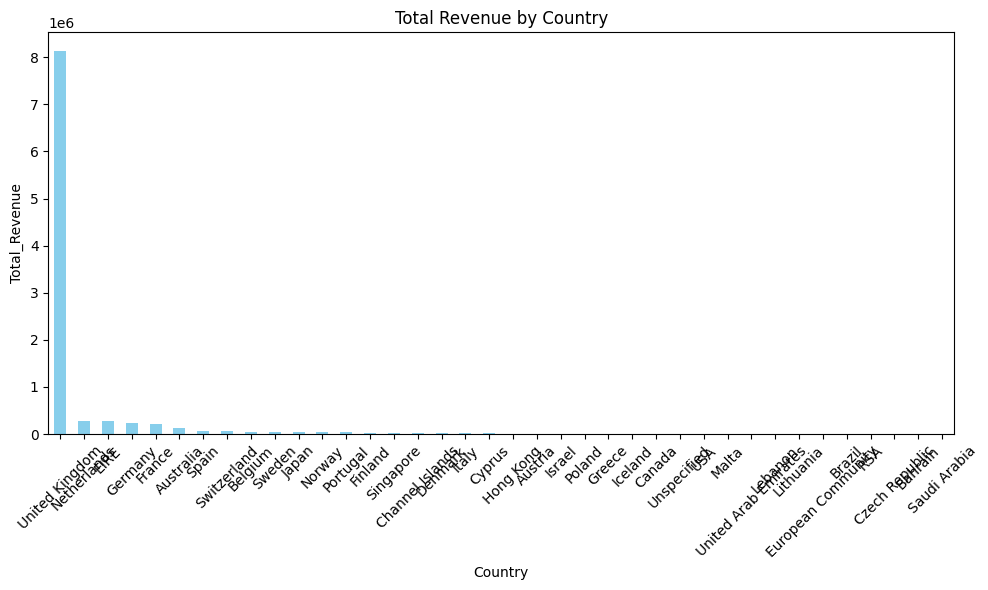

In [28]:
#total sales vis a vie country
country_revenue = df1.groupby('CustomerCountry')['Total_Revenue'].sum()
country_revenue = country_revenue.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
country_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total_Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [29]:
df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])
min_date = df1['BasketDate'].min()
max_date = df1['BasketDate'].max()
print("Date Range - From:", min_date, "To:", max_date)

Date Range - From: 2010-12-01 08:26:00 To: 2011-12-09 12:50:00


<ipython-input-29-600e78544427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])


In [30]:
df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])
max_date = df1['BasketDate'].max()
print("Maximum Date (Most Recent):", max_date)

Maximum Date (Most Recent): 2011-12-09 12:50:00


<ipython-input-30-6be52b70eedd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])


In [31]:
max_date_data = df1[df1['BasketDate'] == max_date]
print("Data for Maximum Date (Most Recent):\n", max_date_data)
df1

Data for Maximum Date (Most Recent):
        CustomerCountry  CustomerID BasketID          BasketDate ProdID  \
471894          France     12680.0   581587 2011-12-09 12:50:00  22631   
471895          France     12680.0   581587 2011-12-09 12:50:00  22556   
471896          France     12680.0   581587 2011-12-09 12:50:00  22555   
471897          France     12680.0   581587 2011-12-09 12:50:00  22728   
471898          France     12680.0   581587 2011-12-09 12:50:00  22727   
471899          France     12680.0   581587 2011-12-09 12:50:00  22726   
471900          France     12680.0   581587 2011-12-09 12:50:00  22730   
471901          France     12680.0   581587 2011-12-09 12:50:00  22367   
471902          France     12680.0   581587 2011-12-09 12:50:00  22629   
471903          France     12680.0   581587 2011-12-09 12:50:00  23256   
471904          France     12680.0   581587 2011-12-09 12:50:00  22613   
471905          France     12680.0   581587 2011-12-09 12:50:00  22899   


,CustomerCountry,CustomerID,BasketID,BasketDate,ProdID,ProdDescr,Qta,Sale,Total_Revenue
0,United Kingdom,17850.0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,United Kingdom,17850.0,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34
2,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,United Kingdom,17850.0,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...
471905,France,12680.0,581587,2011-12-09 12:50:00,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
471906,France,12680.0,581587,2011-12-09 12:50:00,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
471907,France,12680.0,581587,2011-12-09 12:50:00,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60
471908,France,12680.0,581587,2011-12-09 12:50:00,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,14.85


In [32]:
df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])
frequency = df1.groupby('CustomerID')['BasketDate'].count()
print(frequency)
frequency.info()


CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: BasketDate, Length: 4339, dtype: int64
<class 'pandas.core.series.Series'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Series name: BasketDate
Non-Null Count  Dtype
--------------  -----
4339 non-null   int64
dtypes: int64(1)
memory usage: 67.8 KB


<ipython-input-32-1760493a3cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])


In [33]:
df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])
visit_frequency = df1.groupby('CustomerID')['BasketDate'].count()
visit_frequency = visit_frequency.reset_index()
visit_frequency.columns = ['CustomerID', 'VisitFrequency']
print(visit_frequency)

      CustomerID  VisitFrequency
0        12346.0               1
1        12347.0             182
2        12348.0              31
3        12349.0              73
4        12350.0              17
...          ...             ...
4334     18280.0              10
4335     18281.0               7
4336     18282.0              12
4337     18283.0             756
4338     18287.0              70

[4339 rows x 2 columns]


<ipython-input-33-5574785cb284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BasketDate'] = pd.to_datetime(df1['BasketDate'])


In [34]:
grouped = df1.groupby('CustomerID').agg({'Qta':'sum','Sale':'sum','Total_Revenue':'sum','BasketDate': lambda v: (max_date - v.max()).days}).reset_index()
print(grouped)



      CustomerID    Qta     Sale  Total_Revenue  BasketDate
0        12346.0  74215     1.04       77183.60         325
1        12347.0   2458   481.21        4310.00           1
2        12348.0   2341   178.71        1797.24          74
3        12349.0    631   605.10        1757.55          18
4        12350.0    197    65.30         334.40         309
...          ...    ...      ...            ...         ...
4334     18280.0     45    47.65         180.60         277
4335     18281.0     54    39.36          80.82         180
4336     18282.0    103    62.39         178.05           7
4337     18283.0   1397  1220.93        2094.88           3
4338     18287.0   1586   104.55        1837.28          42

[4339 rows x 5 columns]


In [35]:
RFM = pd.merge(visit_frequency, grouped, on='CustomerID', how='outer')
print(RFM)


      CustomerID  VisitFrequency    Qta     Sale  Total_Revenue  BasketDate
0        12346.0               1  74215     1.04       77183.60         325
1        12347.0             182   2458   481.21        4310.00           1
2        12348.0              31   2341   178.71        1797.24          74
3        12349.0              73    631   605.10        1757.55          18
4        12350.0              17    197    65.30         334.40         309
...          ...             ...    ...      ...            ...         ...
4334     18280.0              10     45    47.65         180.60         277
4335     18281.0               7     54    39.36          80.82         180
4336     18282.0              12    103    62.39         178.05           7
4337     18283.0             756   1397  1220.93        2094.88           3
4338     18287.0              70   1586   104.55        1837.28          42

[4339 rows x 6 columns]


In [36]:
new_order = ['CustomerID', 'Qta', 'Sale','BasketDate','VisitFrequency','Total_Revenue']
RFM = RFM[new_order]
RFM

,CustomerID,Qta,Sale,BasketDate,VisitFrequency,Total_Revenue
0,12346.0,74215,1.04,325,1,77183.60
1,12347.0,2458,481.21,1,182,4310.00
2,12348.0,2341,178.71,74,31,1797.24
3,12349.0,631,605.10,18,73,1757.55
4,12350.0,197,65.30,309,17,334.40
...,...,...,...,...,...,...
4334,18280.0,45,47.65,277,10,180.60
4335,18281.0,54,39.36,180,7,80.82
4336,18282.0,103,62.39,7,12,178.05
4337,18283.0,1397,1220.93,3,756,2094.88


In [37]:
RFM.columns = ['CustomerID', 'Qta','Sale','Recency','Frequency','Monetary']
RFM

,CustomerID,Qta,Sale,Recency,Frequency,Monetary
0,12346.0,74215,1.04,325,1,77183.60
1,12347.0,2458,481.21,1,182,4310.00
2,12348.0,2341,178.71,74,31,1797.24
3,12349.0,631,605.10,18,73,1757.55
4,12350.0,197,65.30,309,17,334.40
...,...,...,...,...,...,...
4334,18280.0,45,47.65,277,10,180.60
4335,18281.0,54,39.36,180,7,80.82
4336,18282.0,103,62.39,7,12,178.05
4337,18283.0,1397,1220.93,3,756,2094.88


In [38]:
RFM.describe()

,CustomerID,Qta,Sale,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,1194.214566,285.784424,91.518322,91.708919,2053.797166
std,1721.889758,5055.603014,880.545303,100.009747,228.792813,8988.247836
min,12346.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,13812.500000,160.000000,51.685000,17.000000,17.000000,307.245000
50%,15299.000000,379.000000,127.150000,50.000000,41.000000,674.450000
75%,16778.500000,993.000000,294.425000,141.000000,100.000000,1661.640000
max,18287.000000,197491.000000,33332.450000,373.000000,7847.000000,280206.020000


In [42]:
quantiles = RFM.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Qta,Sale,Recency,Frequency,Monetary
0.25,13812.5,160.0,51.685,17.0,17.0,307.245
0.50,15299.0,379.0,127.150,50.0,41.0,674.450
0.75,16778.5,993.0,294.425,141.0,100.0,1661.640


In [46]:
RFM_Segment = RFM.copy()
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


In [48]:
RFM_Segment

,CustomerID,Qta,Sale,Recency,Frequency,Monetary
0,12346.0,74215,1.04,325,1,77183.60
1,12347.0,2458,481.21,1,182,4310.00
2,12348.0,2341,178.71,74,31,1797.24
3,12349.0,631,605.10,18,73,1757.55
4,12350.0,197,65.30,309,17,334.40
...,...,...,...,...,...,...
4334,18280.0,45,47.65,277,10,180.60
4335,18281.0,54,39.36,180,7,80.82
4336,18282.0,103,62.39,7,12,178.05
4337,18283.0,1397,1220.93,3,756,2094.88


In [57]:
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(FM_Class, args=('Monetary',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)
RFM_Segment

,CustomerID,Qta,Sale,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346.0,74215,1.04,325,1,77183.60,1,1,4,114
1,12347.0,2458,481.21,1,182,4310.00,4,4,4,444
2,12348.0,2341,178.71,74,31,1797.24,2,2,4,224
3,12349.0,631,605.10,18,73,1757.55,3,3,4,334
4,12350.0,197,65.30,309,17,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,45,47.65,277,10,180.60,1,1,1,111
4335,18281.0,54,39.36,180,7,80.82,1,1,1,111
4336,18282.0,103,62.39,7,12,178.05,4,1,1,411
4337,18283.0,1397,1220.93,3,756,2094.88,4,4,4,444


Who are my best customers?

In [53]:
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Qta,Sale,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
1690,14646.0,197491,5176.09,1,2080,280206.02,4,4,4,444
4202,18102.0,64124,1940.92,0,431,259657.30,4,4,4,444
3729,17450.0,69993,1143.32,7,337,194550.79,4,4,4,444
1880,14911.0,80515,26185.72,0,5677,143825.06,4,4,4,444
1334,14156.0,57885,5357.68,9,1400,117379.63,4,4,4,444


Q. Which customers are at the verge of churning?

In [54]:
RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('Monetary', ascending=False).head(5)

,CustomerID,Qta,Sale,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346.0,74215,1.04,325,1,77183.60,1,1,4,114
2503,15749.0,18028,30.44,234,10,44534.30,1,1,4,114
2012,15098.0,121,1303.95,181,3,39916.50,1,1,4,114
324,12744.0,5241,12949.99,51,222,21279.29,2,4,4,244
459,12939.0,4876,112.96,63,47,11581.80,2,3,4,234


Q. Who are the lost customers?

In [55]:
RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(5)

,CustomerID,Qta,Sale,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
1038,13747.0,8,9.95,373,1,79.60,1,1,1,111
3104,16583.0,111,35.90,373,14,233.45,1,1,1,111
355,12791.0,97,16.85,373,2,192.60,1,1,1,111
3868,17643.0,71,32.15,372,8,101.55,1,1,1,111
402,12855.0,30,4.65,372,3,38.10,1,1,1,111


Q. Who are loyal customers?

In [56]:
RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('Monetary', ascending=False).head(5)

,CustomerID,Qta,Sale,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
1690,14646.0,197491,5176.09,1,2080,280206.02,4,4,4,444
4202,18102.0,64124,1940.92,0,431,259657.30,4,4,4,444
3729,17450.0,69993,1143.32,7,337,194550.79,4,4,4,444
1880,14911.0,80515,26185.72,0,5677,143825.06,4,4,4,444
55,12415.0,77670,2097.08,23,716,124914.53,3,4,4,344


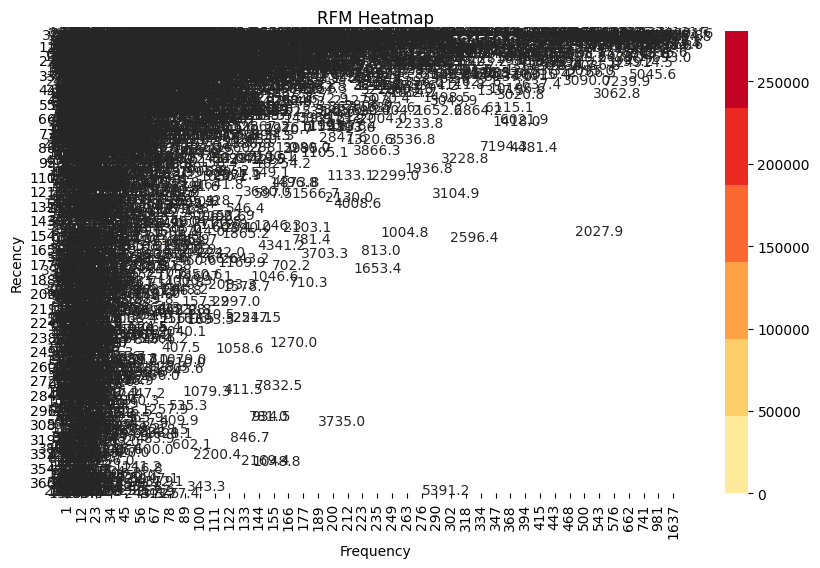

In [69]:
pivot_table = RFM.pivot_table(index='Recency', columns='Frequency', values='Monetary')
custom_cmap = sns.color_palette("YlOrRd")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap=custom_cmap, annot=True, fmt=".1f", linewidths=0.5, cbar=True)
plt.title('RFM Heatmap')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()

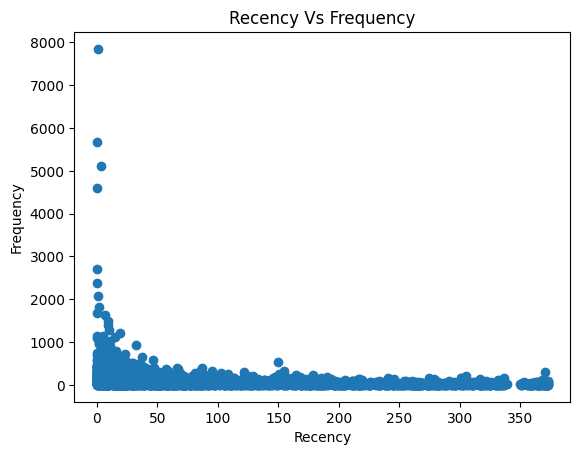

In [39]:
# Choose the columns for the scatter plot
x_data = RFM['Recency']
y_data = RFM['Frequency']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title (customize as needed)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Vs Frequency')

# Show the plot
plt.show()

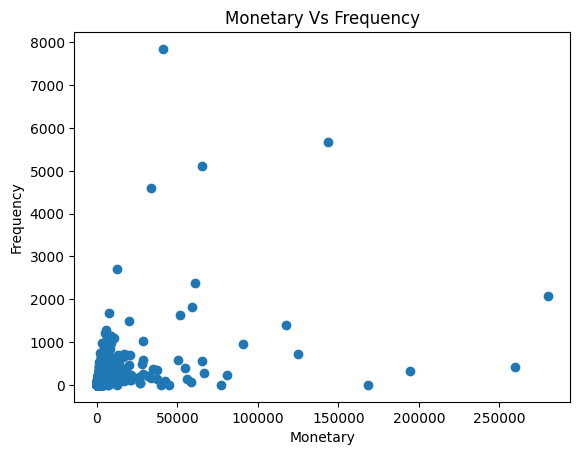

In [40]:
# Choose the columns for the scatter plot
x_data = RFM['Monetary']
y_data = RFM['Frequency']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title (customize as needed)
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Vs Frequency')

# Show the plot
plt.show()

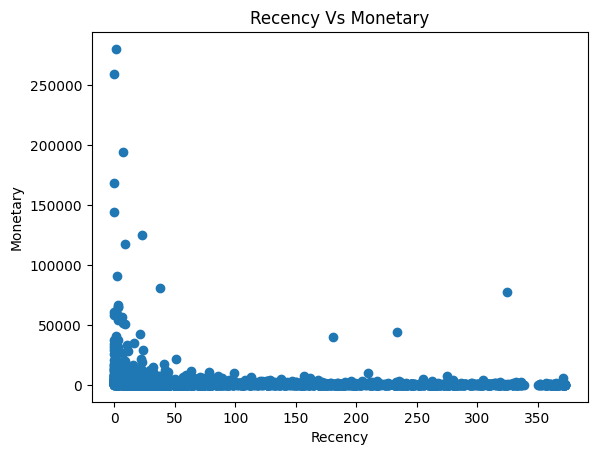

In [41]:
# Choose the columns for the scatter plot
x_data = RFM['Recency']
y_data = RFM['Monetary']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title (customize as needed)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency Vs Monetary')

# Show the plot
plt.show()